# EB5002 Text Processing

# Data Exploration

## Set the working directory

In [1]:
import os
os.chdir(os.path.join(os.path.sep, 'home', 'tkokkeng', 'Documents', 'EB5002-TextProcessing'))
os.getcwd()

'/home/tkokkeng/Documents/EB5002-TextProcessing'

In [2]:
import sys
if os.path.join(os.getcwd(), 'source') not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), 'source'))
sys.path

['/home/tkokkeng/Documents/EB5002-TextProcessing',
 '/home/tkokkeng/Documents/EB5002-TextProcessing/source',
 '/home/tkokkeng/python/python367/ptvenv/lib/python36.zip',
 '/home/tkokkeng/python/python367/ptvenv/lib/python3.6',
 '/home/tkokkeng/python/python367/ptvenv/lib/python3.6/lib-dynload',
 '/usr/lib/python3.6',
 '',
 '/home/tkokkeng/python/python367/ptvenv/lib/python3.6/site-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages/IPython/extensions',
 '/home/tkokkeng/.ipython']

## Import libraries

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re
import io
import json
import numpy as np

In [4]:
pd.set_option('max_colwidth', 200)

## Load data, pre-processed and save to file.

Before, the top and bottom non-relevant paragraphs were removed manually from the data.

In [5]:
outfile = open(os.path.join('data', '1289-0-preprocessed.txt'), mode='w', encoding='utf-8')
if os.path.isfile(os.path.join('data', '1289-0-lesstopbottom.txt')):
    with open(os.path.join('data', '1289-0-lesstopbottom.txt'), mode='r', encoding='utf-8-sig') as infile:  # encoding to ignore Byte Order Marker (BOM)
        for a_line in infile:
            if not (re.match('^\ *\[.*\]$', a_line)  # remove e.g. [Picture: ...]
                    or a_line.isupper()  # remove titles
                    or re.match('^\ *Chapter|\ *chapter|\ *CHAPTER', a_line)  # remove e.g. Chapter I
                    or re.match('^\ *[\*]+\ *', a_line)):  # remove combinations of * * * * * * *
                outfile.write(a_line)
outfile.close()

In [6]:
with open(os.path.join('data', '1289-0-preprocessed.txt'), mode='r', encoding='utf-8') as infile:
    book1 = infile.read()

In [7]:
book1[:2000]

'UNDER none of the accredited ghostly circumstances, and environed by none\nof the conventional ghostly surroundings, did I first make acquaintance\nwith the house which is the subject of this Christmas piece.  I saw it in\nthe daylight, with the sun upon it.  There was no wind, no rain, no\nlightning, no thunder, no awful or unwonted circumstance, of any kind, to\nheighten its effect.  More than that: I had come to it direct from a\nrailway station: it was not more than a mile distant from the railway\nstation; and, as I stood outside the house, looking back upon the way I\nhad come, I could see the goods train running smoothly along the\nembankment in the valley.  I will not say that everything was utterly\ncommonplace, because I doubt if anything can be that, except to utterly\ncommonplace people—and there my vanity steps in; but, I will take it on\nmyself to say that anybody might see the house as I saw it, any fine\nautumn morning.\n\nThe manner of my lighting on it was this.\n\nI

## Tokenise the data

In [8]:
try: # Use the default NLTK tokenizer.
    from nltk import word_tokenize, sent_tokenize 
    # Testing whether it works. 
    # Sometimes it doesn't work on some machines because of setup issues.
    word_tokenize(sent_tokenize("This is a foobar sentence. Yes it is.")[0])
except: # Use a naive sentence tokenizer and toktok.
    from nltk.tokenize import ToktokTokenizer
    # See https://stackoverflow.com/a/25736515/610569
    sent_tokenize = lambda x: re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', x)
    # Use the toktok tokenizer that requires no dependencies.
    toktok = ToktokTokenizer()
    word_tokenize = toktok.tokenize

In [9]:
book1_tokenised = [ list(map(str.lower, word_tokenize(sent))) for sent in sent_tokenize(book1) ]

In [10]:
book1_tokenised[0]

['under',
 'none',
 'of',
 'the',
 'accredited',
 'ghostly',
 'circumstances',
 ',',
 'and',
 'environed',
 'by',
 'none',
 'of',
 'the',
 'conventional',
 'ghostly',
 'surroundings',
 ',',
 'did',
 'i',
 'first',
 'make',
 'acquaintance',
 'with',
 'the',
 'house',
 'which',
 'is',
 'the',
 'subject',
 'of',
 'this',
 'christmas',
 'piece',
 '.']

In [11]:
len(book1_tokenised)

507

## Preprocessed, tokenised and save data to file

In [12]:
filenames = ['1289-0', '1400-0', '1467-0', '27924-0', '564-0']  # add all the filenames of the books here.

* Removed the top and bottom irrelevant parts of the text manually and save the files to the folder .../manual-processed
* The pre-processed files will be saved to the folder .../pre-processed
* The consolidated tokenised data will be saved in .../final/all_books.txt

In [13]:
all_books = []

for filename in filenames:
    
    outfile = open(os.path.join('data', 'pre-processed', filename + '-preprocessed.txt'), mode='w', encoding='utf-8')
    if os.path.isfile(os.path.join('data', 'manual-processed', filename + '-lesstopbottom.txt')):
        with open(os.path.join('data', 'manual-processed', filename + '-lesstopbottom.txt'), mode='r', encoding='utf-8-sig') as infile:  # encoding to ignore Byte Order Marker (BOM)
            for a_line in infile:
                if not (re.match('^\ *\[.*\]$', a_line)  # remove e.g. [Picture: ...]
                        or a_line.isupper()  # remove titles
                        or re.match('^\ *Chapter|\ *chapter|\ *CHAPTER', a_line)  # remove e.g. Chapter I
                        or re.match('^\ *[\*]+\ *', a_line)):  # remove combinations of * * * * * * *
                    outfile.write(a_line)
    outfile.close()
    
    with open(os.path.join('data', 'pre-processed', filename + '-preprocessed.txt'), mode='r', encoding='utf-8') as infile:
        a_book = infile.read()
        
    a_book_tokenised = [ list(map(str.lower, word_tokenize(sent))) for sent in sent_tokenize(a_book) ]
    all_books += (a_book_tokenised)

In [14]:
with io.open(os.path.join('data', 'final', 'all_books.txt'), 'w', encoding='utf8') as outfile:
    json.dump(all_books, outfile, ensure_ascii=False)

## Test the saved file

In [6]:
with io.open(os.path.join('data', 'final', 'all_books_8975.txt'), encoding='utf8') as infile:
    tokenized_text = json.load(infile)


## Text Pre-processing

In [8]:
max([ len(i) for i in tokenized_text ])

407

Text(0, 0.5, 'Frequency')

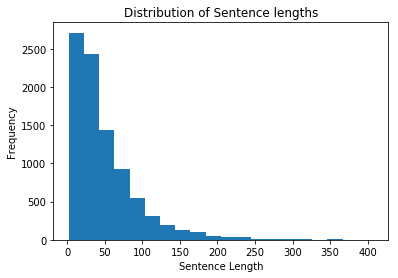

In [13]:
plt.hist([ len(i) for i in tokenized_text ], bins=20)
plt.title('Distribution of Sentence lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

In [14]:
sum(j > 100 for j in [ len(i) for i in tokenized_text ])

962

In [15]:
tokenized_text = list(map(lambda x: x[:100], tokenized_text))
max([ len(i) for i in tokenized_text ])

100

### Reduce all sentences to maximum length of 100 words

In [16]:
[ tokenized_text.index(i) for i in tokenized_text if len(i) == 100 ][0]

6

In [17]:
tokenized_text[6]

['i',
 'had',
 'got',
 'into',
 'the',
 'train',
 'at',
 'midnight',
 ',',
 'and',
 'had',
 'fallen',
 'asleep',
 ',',
 'and',
 'had',
 'woke',
 'up',
 'and',
 'had',
 'sat',
 'looking',
 'out',
 'of',
 'window',
 'at',
 'the',
 'brilliant',
 'northern',
 'lights',
 'in',
 'the',
 'sky',
 ',',
 'and',
 'had',
 'fallen',
 'asleep',
 'again',
 ',',
 'and',
 'had',
 'woke',
 'up',
 'again',
 'to',
 'find',
 'the',
 'night',
 'gone',
 ',',
 'with',
 'the',
 'usual',
 'discontented',
 'conviction',
 'on',
 'me',
 'that',
 'i',
 'hadn',
 '’',
 't',
 'been',
 'to',
 'sleep',
 'at',
 'all',
 ';',
 '—',
 'upon',
 'which',
 'question',
 ',',
 'in',
 'the',
 'first',
 'imbecility',
 'of',
 'that',
 'condition',
 ',',
 'i',
 'am',
 'ashamed',
 'to',
 'believe',
 'that',
 'i',
 'would',
 'have',
 'done',
 'wager',
 'by',
 'battle',
 'with',
 'the',
 'man',
 'who',
 'sat']

## Divide data into train and validation splits

In [ ]:
train_idx = np.random.choice(range(len(tokenized_text)), size=6000, replace=False)
train_idx

In [ ]:
tokenized_text_train = [ tokenized_text[i] for i in train_idx ]

In [ ]:
with io.open(os.path.join('tokenized_train.json'), 'w', encoding='utf8') as outfile:
    json.dump(tokenized_text_train, outfile, ensure_ascii=False)

In [ ]:
val_idx = list(set(range(len(tokenized_text))) - set(train_idx))
tokenized_text_val = [ tokenized_text[i] for i in val_idx ]
with io.open(os.path.join('tokenized_val.json'), 'w', encoding='utf8') as outfile:
    json.dump(tokenized_text_val, outfile, ensure_ascii=False)

## Reload saved train and validation splits

In [18]:
with io.open(os.path.join('data', 'splits', 'tokenized_train_100.json'), encoding='utf8') as infile:
    tokenized_text_train = json.load(infile)
with io.open(os.path.join('data', 'splits', 'tokenized_val_100.json'), encoding='utf8') as infile:
    tokenized_text_val = json.load(infile)

In [19]:
print(len(tokenized_text_train), len(tokenized_text_val))

6000 2975


In [20]:
tokenized_text_train[0]

['there',
 'i',
 'stood',
 ',',
 'for',
 'minutes',
 ',',
 'looking',
 'at',
 'joe',
 ',',
 'already',
 'at',
 'work',
 'with',
 'a',
 'glow',
 'of',
 'health',
 'and',
 'strength',
 'upon',
 'his',
 'face',
 'that',
 'made',
 'it',
 'show',
 'as',
 'if',
 'the',
 'bright',
 'sun',
 'of',
 'the',
 'life',
 'in',
 'store',
 'for',
 'him',
 'were',
 'shining',
 'on',
 'it.',
 '“good-bye',
 ',',
 'dear',
 'joe',
 '!',
 '--',
 'no',
 ',',
 'don',
 '’',
 't',
 'wipe',
 'it',
 'off',
 '--',
 'for',
 'god',
 '’',
 's',
 'sake',
 ',',
 'give',
 'me',
 'your',
 'blackened',
 'hand',
 '!',
 '--',
 'i',
 'shall',
 'be',
 'down',
 'soon',
 'and',
 'often.',
 '”',
 '“never',
 'too',
 'soon',
 ',',
 'sir',
 ',',
 '”',
 'said',
 'joe',
 ',',
 '“and',
 'never',
 'too',
 'often',
 ',',
 'pip',
 '!',
 '”',
 'biddy',
 'was']